<a href="https://colab.research.google.com/github/stcoats/LVS_content/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression workshop

In this workshop we will use R to do some basic regression tasks. First, we will do a linear regression using height and weight. Then, we will try a logistic regression.

In [41]:
###REGRESSION WORKSHOP
#Can we predict height from weight?
set.seed(2)

height <- c(175, 168, 170, 171, 169, 165, 165, 160, 180, 186) #some height values
weight <- c(80, 68, 72, 75, 70, 65, 62, 60, 85, 90)    #some weight values

df<-data.frame(height,weight)
names(df)<-c("y","x")
m<-lm(y~x,df)  # this is the model that regresses height as a function of weight

lm_eqn <- function(df){
  m <- lm(y ~ x, df);
  eq <- substitute(italic(y) == a + b * italic(x)*"," ~ italic(r)^2 ~ "=" ~ r2,
                       list(a = format(coef(m)[1], digits = 2)[[1]],
                            b = format(coef(m)[2], digits = 2)[[1]],
                            r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}
res <- signif(residuals(m), 5)
pre <- predict(m) # plot distances between points and the regression line


Let's inspect our data frame.

In [40]:
df

y,x
<dbl>,<dbl>
175,80
168,68
170,72
171,75
169,70
165,65
165,62
160,60
180,85


This shows us the regression line

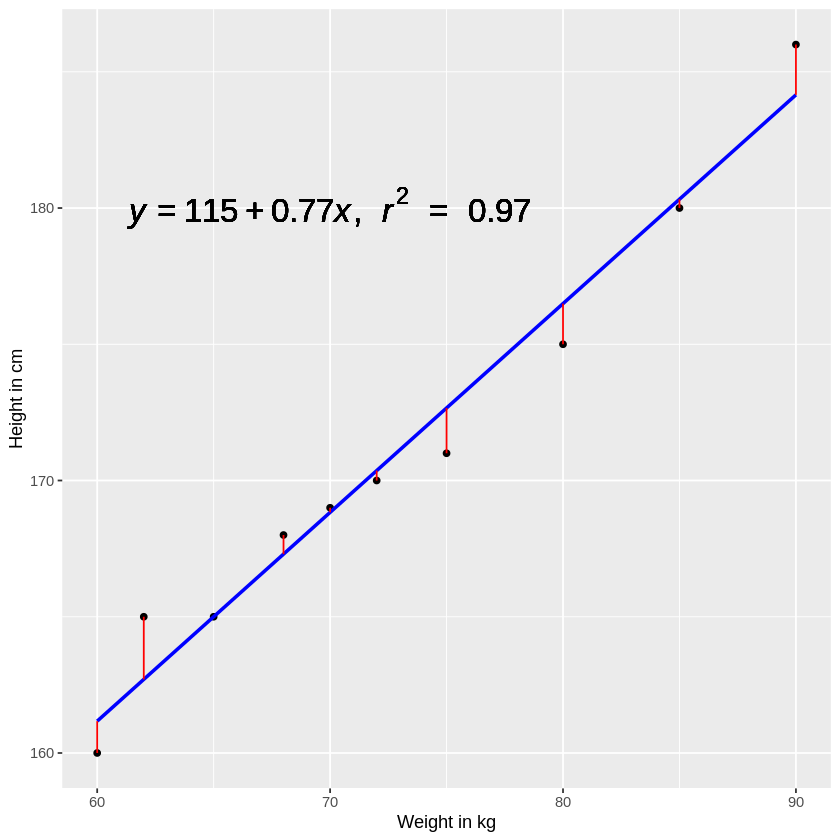

In [42]:
ggplot(df,aes(x=x,y=y))+geom_point()+
  xlab("Weight in kg") +
  ylab("Height in cm") +
  geom_smooth(method = "lm", se=FALSE, color="blue",fullrange=TRUE,
              formula = y ~ x)+
  geom_text(x = 70, y = 180, label = lm_eqn(df), parse = TRUE, size = 7)+
  geom_segment(aes(xend = x, yend = pre), col="red")

$r^2$ is the accuracy of the model. It ranges from 0 to 1. A linear regression model seems quite accurate for this data.

What if we add an outlier?

In [43]:
df[nrow(df) + 1,] = c(160,95) # we added a short person who is heavy
m<-lm(y~x,df)

lm_eqn <- function(df){
  m <- lm(y ~ x, df);
  eq <- substitute(italic(y) == a + b * italic(x)*"," ~ italic(r)^2 ~ "=" ~ r2,
                       list(a = format(coef(m)[1], digits = 2)[[1]],
                            b = format(coef(m)[2], digits = 2)[[1]],
                            r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}
res <- signif(residuals(m), 5)
pre <- predict(m)

Let's inspect the data again. You can see a new value has been added in row 11: someone who is 160 cm tall and who weighs 95 kg!

In [44]:
df

,y,x
,<dbl>,<dbl>
1,175,80
2,168,68
3,170,72
4,171,75
5,169,70
6,165,65
7,165,62
8,160,60
9,180,85


Plot the model again

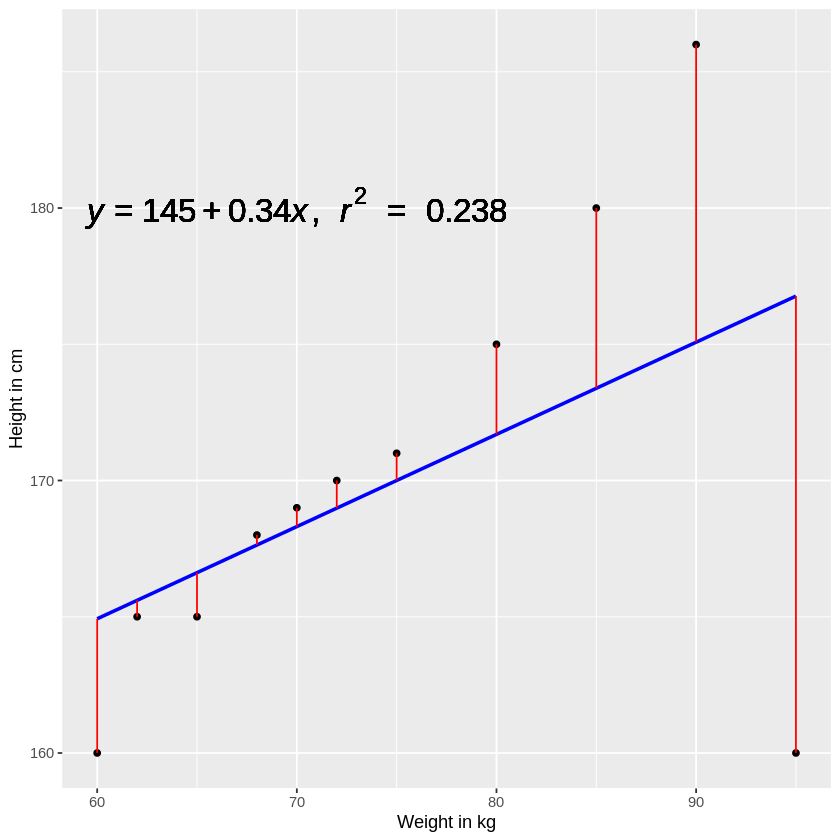

In [45]:
ggplot(df,aes(x=x,y=y))+geom_point()+
  xlab("Weight in kg") +
  ylab("Height in cm") +
  geom_smooth(method = "lm", se=FALSE, color="blue",fullrange=TRUE,
              formula = y ~ x)+
  geom_text(x = 70, y = 180, label = lm_eqn(df), parse = TRUE, size = 7)+
  geom_segment(aes(xend = x, yend = pre), col="red")

Not a good model for this data set! Now add another outlier, a person who is 1.98m tall and 70kg.

In [46]:
df[nrow(df) + 1,] = c(198, 70) # we added a short person who is heavy
m<-lm(y~x,df)

lm_eqn <- function(df){
  m <- lm(y ~ x, df);
  eq <- substitute(italic(y) == a + b * italic(x)*"," ~ italic(r)^2 ~ "=" ~ r2,
                       list(a = format(coef(m)[1], digits = 2)[[1]],
                            b = format(coef(m)[2], digits = 2)[[1]],
                            r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}
res <- signif(residuals(m), 5)
pre <- predict(m)

Now plot again!

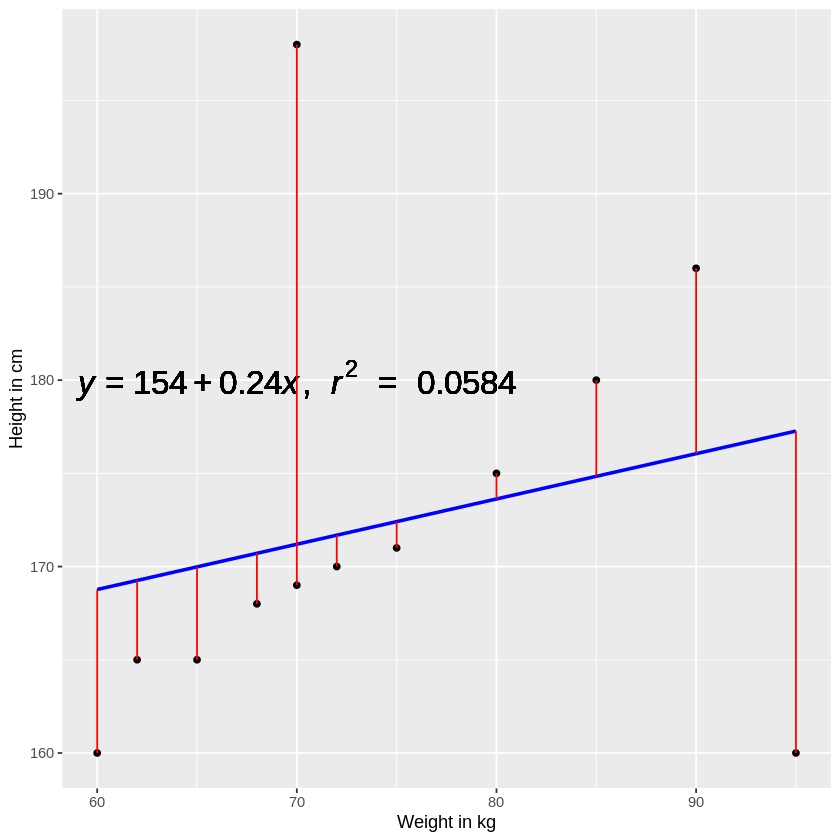

In [47]:
ggplot(df,aes(x=x,y=y))+geom_point()+
  xlab("Weight in kg") +
  ylab("Height in cm") +
  geom_smooth(method = "lm", se=FALSE, color="blue",fullrange=TRUE,
              formula = y ~ x)+
  geom_text(x = 70, y = 180, label = lm_eqn(df), parse = TRUE, size = 7)+
  geom_segment(aes(xend = x, yend = pre), col="red")

To get summaries statistics of a model use the following command:

In [48]:
summary(m)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.268  -4.437  -1.941   2.321  26.802 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 154.2002    23.1563   6.659 5.64e-05 ***
x             0.2428     0.3084   0.787    0.449    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.32 on 10 degrees of freedom
Multiple R-squared:  0.05837,	Adjusted R-squared:  -0.03579 
F-statistic: 0.6199 on 1 and 10 DF,  p-value: 0.4493


#### Model Information:
Call: The formula used to fit the linear model. In this case, it's y ~ x, indicating that the dependent variable y is modeled as a linear function of the independent variable x.
#### Residuals:
Min, 1Q, Median, 3Q, Max: Descriptive statistics of the residuals (the differences between the observed and predicted values). These statistics provide insights into the spread and central tendency of the residuals.
#### Coefficients:
* Intercept (Estimate): The estimated intercept of the linear regression equation. In this case, the intercept is approximately 154.2002.
* x (Estimate): The estimated coefficient for the variable x. In this case, the coefficient is approximately 0.2428.
* Std. Error: Standard errors associated with the coefficient estimates. These indicate the precision of the estimates.
* t value: The t-statistic for testing the null hypothesis that the coefficient is equal to zero.
* Pr(>|t|): The p-value associated with the t-test. It indicates the probability of observing a t-statistic as extreme as the one computed, assuming the null hypothesis is true.
* Significance Codes: Asterisks indicating the level of statistical significance (* for p < 0.05, ** for p < 0.01, *** for p < 0.001).

#### Model Summary:
* Residual standard error: An estimate of the standard deviation of the residuals.
* Degrees of Freedom: The degrees of freedom associated with the residuals.
* Multiple R-squared: The proportion of variance in the dependent variable y explained by the independent variable x.
* Adjusted R-squared: The R-squared adjusted for the number of predictors in the model.
* F-statistic: The F-statistic for testing the overall significance of the model.
* p-value: The p-value associated with the F-statistic.

#### Interpretation:
* The intercept (154.2002) is statistically significant (p < 0.001).
* The coefficient for x (0.2428) is not statistically significant (p = 0.449).
* The model as a whole is not statistically significant, as indicated by the * * p-value associated with the F-statistic (p = 0.4493).
* The Multiple R-squared (0.05837) suggests that the model explains a small proportion of the variance in the dependent variable.
* Overall, based on the information provided, it seems that the linear model does not provide a statistically significant relationship between the variables, and the explanatory power of the model is limited (low R-squared).

### Visualizing a few regressions

* Some material borrowed from http://www.danielezrajohnson.com/glasgow_workshop.R


In [77]:
set.seed(2)  #This makes random values reproducible
library(tidyverse) # This is a package for data analysis

#Let's generate two sets of points and plot them

x1 <- runif(10, 0, 2)  #10 random values between 0 and 2
y1 <- 0 + x1*0.8 + rnorm(10,0,0.1) #10 corresponding y values

x2 <- runif(10, 0, 2) #10 random values between 0 and 2
y2 <- 1 + x2*0.4  + rnorm(10,0,0.1) #10 corresponding y values

df_1 <- data.frame(x1,y1) #we put them in a data frame

df_1 #show the data frame

df_2 <- data.frame(x2,y2) # second data frame

df_3 <- data.frame(c(x1,x2),c(y1,y2));names(df_3) <- c("x3","y3")

x1,y1
<dbl>,<dbl>
0.3697645,0.3090536
1.4047481,1.1945939
1.1466527,0.8933523
0.3361038,0.4673305
1.8876787,1.4962642
1.8869499,1.5513250
0.2583180,0.3048296
1.6668976,1.2942486
0.9360370,0.6448627


Let's create a plot of the first set of points

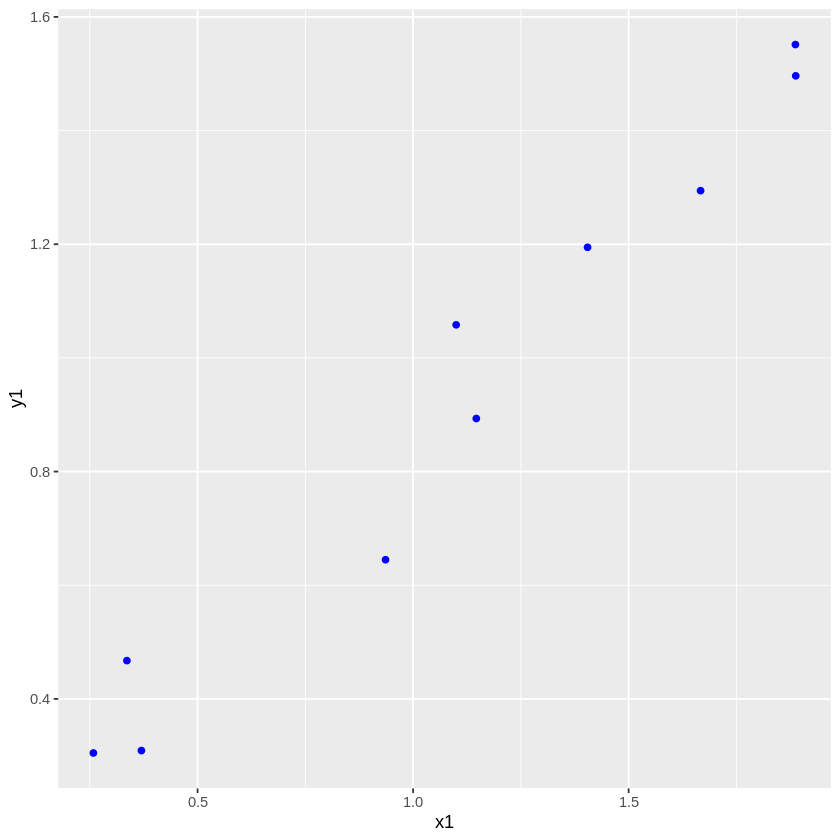

In [50]:
p <- ggplot(data = df_1) +
  geom_point(mapping = aes(x = x1, y = y1), color="blue")

#View the plot with
p

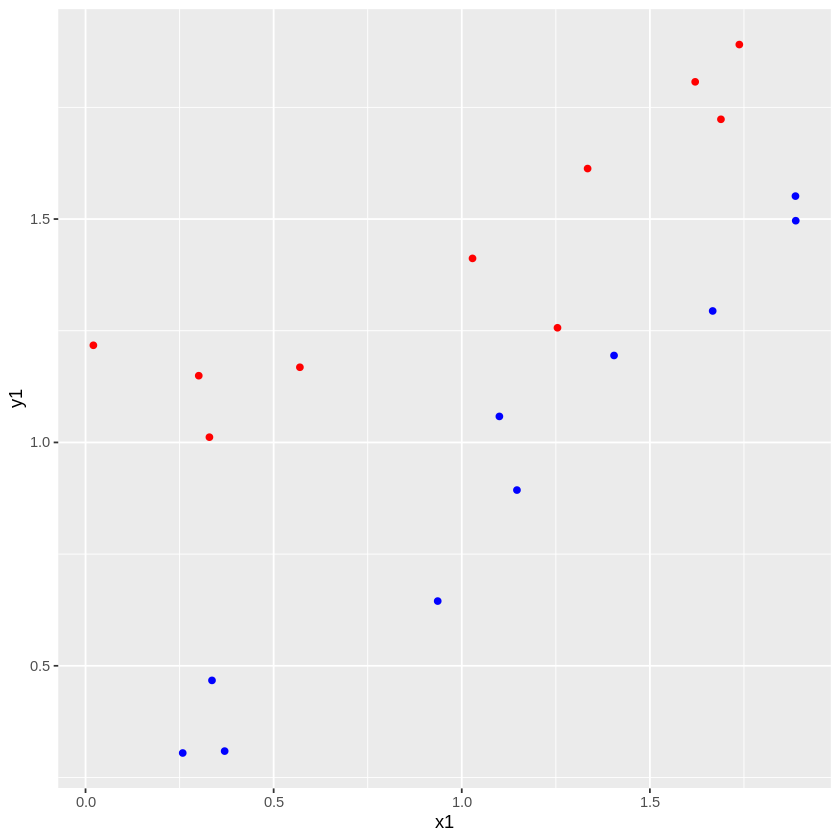

In [52]:
#Now add the second set of points
p1 <- p + geom_point(data=df_2,mapping = aes(x = x2, y = y2),color="red")
p1

* `lm` is the function to create a linear model
* We create a linear model regressing the y1 data with the x1 data in the df_1 data frame
* We save it in `m` and check the summary

In [54]:
m<-lm(y1~x1,df_1)

summary(m)


Call:
lm(formula = y1 ~ x1, data = df_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.155531 -0.059312 -0.001356  0.046648  0.136305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10664    0.06284   1.697    0.128    
x1           0.74116    0.05033  14.727 4.44e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09426 on 8 degrees of freedom
Multiple R-squared:  0.9644,	Adjusted R-squared:   0.96 
F-statistic: 216.9 on 1 and 8 DF,  p-value: 4.442e-07


This is a function to write the equation for the line on the plot

In [69]:

lm_eqn1 <- function(df,y){
  m <- lm(y ~ 1, df);
  eq <- substitute(italic(y) == a + b * italic(x)*","~~italic(r)^2~"="~r2,
                   list(a = format(coef(m)[1], digits = 3)[[1]],
                        b = 0,
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

Let's start with an "intercept only" regression. This simply maps a line at the mean of the values. For the blue points:

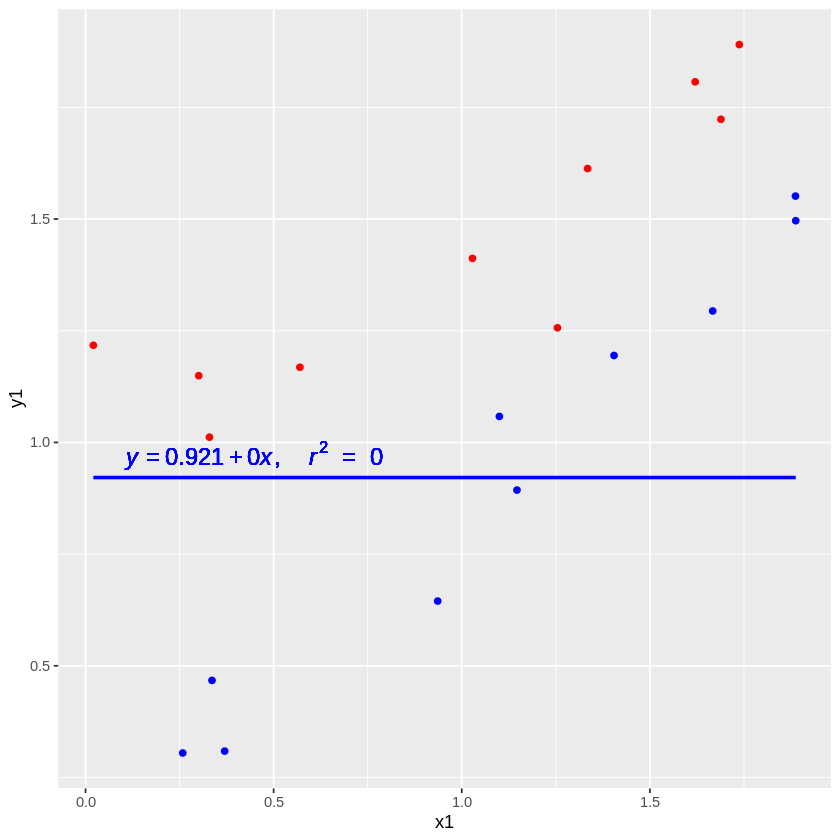

In [74]:
p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ 1)+
  geom_text(x = .45, y = mean(df_1$y1)+.05, label = lm_eqn1(df_1,y1), parse = TRUE,
            color="blue", size=5)

Add the red points

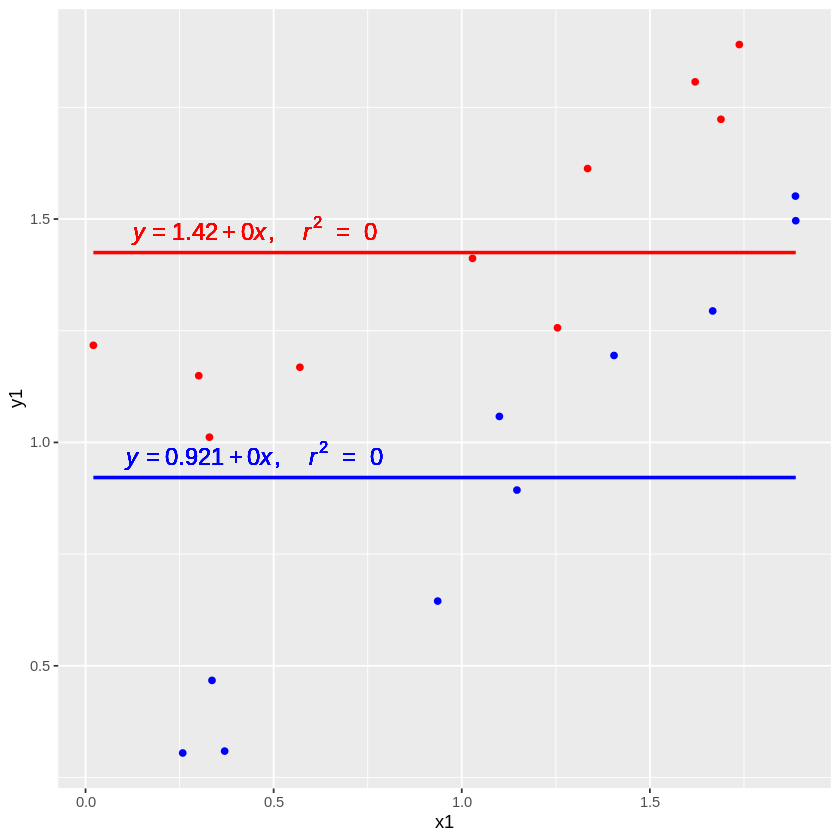

In [73]:
p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x2, y = y2), data = df_2, fullrange=TRUE,
              method = "lm", se = FALSE, color = "red", formula = y ~ 1)+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ 1)+
  geom_text(x = .45, y = mean(df_2$y2)+.05, label = lm_eqn1(df_2, y2), parse = TRUE,
            color="red", size=5)+
  geom_text(x = .45, y = mean(df_1$y1)+.05, label = lm_eqn1(df_1, y1), parse = TRUE,
            color="blue", size=5)


Now the combined data set

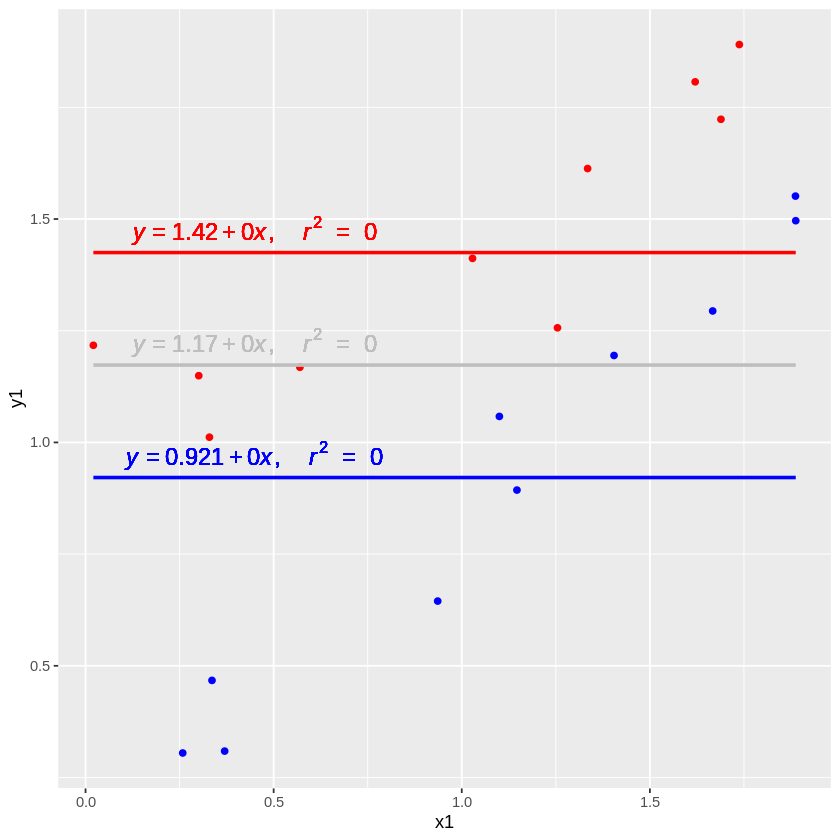

In [79]:
p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x2, y = y2), data = df_2, fullrange=TRUE,
              method = "lm", se = FALSE, color = "red", formula = y ~ 1)+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ 1)+
  geom_smooth(aes(x = x3, y = y3), data = df_3, fullrange=TRUE,
              method = "lm", se = FALSE, color = "gray", formula = y ~ 1)+
  geom_text(x = .45, y = mean(df_2$y2)+.05, label = lm_eqn1(df_2, y2), parse = TRUE,
            color="red", size=5)+
  geom_text(x = .45, y = mean(df_1$y1)+.05, label = lm_eqn1(df_1, y1), parse = TRUE,
            color="blue", size=5)+
  geom_text(x = .45, y = mean(df_3$y3)+.05, label = lm_eqn1(df_3, df_3$y3), parse = TRUE,
            color="gray",size=5)

* Now let's try with one predictor
* New function to write the equation

In [82]:
lm_eqn1 <- function(df,y,x){
  m1 <- lm(y ~ x, df);
  eq1 <- substitute(italic(y) == a + b * italic(x)*","~~italic(r)^2~"="~r2,
                   list(a = format(coef(m1)[1], digits = 2)[[1]],
                        b = format(coef(m1)[2], digits = 2)[[1]],
                        r2 = format(summary(m1)$r.squared, digits = 3)))
  as.character(as.expression(eq1));
}

res <- signif(residuals(m), 5) #residuals

pre <- predict(m)

Ordinary least squares regression of blue points

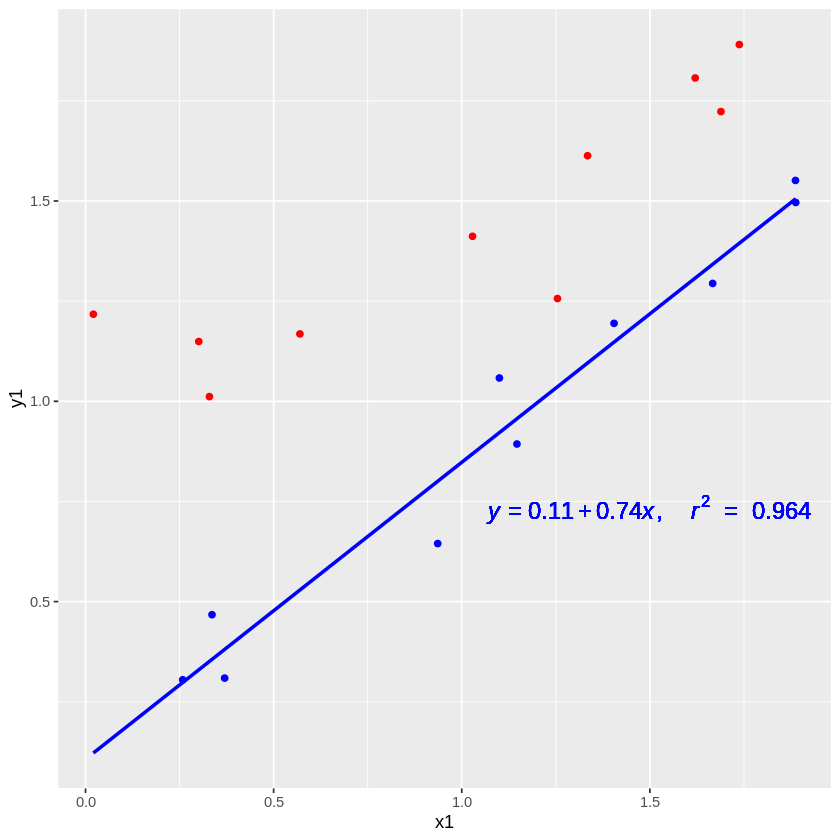

In [83]:
p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ x)+
  geom_text(x = 1.5, y = .73, label = lm_eqn1(df_1,y1,x1), parse = TRUE,
            color="blue", size=5)

In [ ]:









 #



#note the intercept and the slope. r^2 is close to 1, this means the model
# is accurate (the blue points are close to the blue line)

# add red points

p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ x)+
  geom_text(x = 1.5, y = .73, label = lm_eqn1(df_1,y1,x1), parse = TRUE,
            color="blue", size=3)+
  geom_smooth(aes(x = x2, y = y2), data = df_2, fullrange=TRUE,
              method = "lm", se = FALSE, color = "red", formula = y ~ x)+
  geom_text(x = .65, y = 1.6, label = lm_eqn1(df_2,y2,x2), parse = TRUE,
            color="red", size=3)

#note the intercept and the slope. r^2 is a bit lower, this means the model
# is a bit less accurate (the red points are further from the red line)

# complete set

p + geom_point(data = df_2,aes(x=x2,y=y2),color="red")+
  geom_smooth(aes(x = x2, y = y2), data = df_2, fullrange=TRUE,
              method = "lm", se = FALSE, color = "red", formula = y ~ x)+
  geom_smooth(aes(x = x1, y = y1), data = df_1, fullrange=TRUE,
              method = "lm", se = FALSE, color = "blue", formula = y ~ x)+
  geom_smooth(aes(x = x3, y = y3), data = df_3, fullrange=TRUE,
              method = "lm", se = FALSE, color = "gray", formula = y ~ x)+
  geom_text(x = .65, y = 1.6, label = lm_eqn1(df_2,y2,x2), parse = TRUE,
            color="red", size=3) +
  geom_text(x = 1.5, y = .73, label = lm_eqn1(df_1,y1,x1), parse = TRUE,
            color="blue", size=3)+
  geom_text(x = .68, y = .9, label = lm_eqn1(df_3,df_3$y3,df_3$x3), parse = TRUE,
            color="gray",size=3)

# If we take the entire dataset into account, the linear model is a less
# accurate predictor of the values






#There are different ways to visualize data using R. We have been using the
#ggplot 2 package. Here is the same thing in the "base" package.

blankslide()
axis(1, at = seq(0,2,.2))
axis(2, at = seq(0,2,.2))
points(x1, y1, pch = 19, col = "blue")
points(x2, y2, pch = 19, col = "red")

title(main = "lm(y ~ x)")

abline(m1 <- lm(c(y1, y2) ~ c(x1, x2)), lwd = 2)
text(1.5, 0.5, paste("intercept =", round(coef(m1)[1],2)), cex = 1)
text(1.5, 0.3, paste("slope =", round(coef(m1)[2],2)), cex = 1)

######### LABOV DATA

ds<-read.csv("http://www.danielezrajohnson.com/ds.csv")

#examine the data
head(ds)
str(ds)

#now we can create some logistic regression models. This is done using the
#glm function

m0<-glm(r~1,ds,family=binomial)   #a baseline in which r is always 1

ms<-glm(r~store,ds,family=binomial(link="logit")) #predict r from the store
ms1<-glm(r~word,ds,family=binomial(link="logit")) #predict r from the word
mf<-glm(r~store+word+emphasis,ds,family=binomial(link="logit")) #predict
#from all three independent variables

summary(mf)

#Let's make some barplots
bp<-barplot(table(ds$r,ds$store),main="r realization by store (Labov 1966)",col=c("darkblue","red"),legend=c("no r realization","r realization"), ylim=c(0,500),beside=T)
text(as.vector(table(ds$r,ds$store)),x=bp,y=unname(as.vector(table(ds$r,ds$store)))+10)

bp<-barplot(table(ds$r,ds$emphasis),main="r realization by emphasis (Labov 1966)",col=c("darkblue","red"),legend=c("no r realization","r realization"), ylim=c(0,500),beside=T)
text(as.vector(table(ds$r,ds$emphasis)),x=bp,y=unname(as.vector(table(ds$r,ds$emphasis)))+10)

bp<-barplot(table(ds$r,ds$word),main="r realization by word (Labov 1966)",col=c("darkblue","red"),legend=c("no r realization","r realization"), ylim=c(0,500),beside=T)
text(as.vector(table(ds$r,ds$word)),x=bp,y=unname(as.vector(table(ds$r,ds$word)))+10)



install.packages("effects") #package to visualize generalized linear models
library(effects)
plot(allEffects(mf))

newdatamf <- data.frame(c(0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1))
newdatamf <- data.frame(store = c(rep("Macy's",10),rep("Saks",10)),
                        emphasis = rep(c(rep("emphatic",2),rep("normal",2)),5),
                        word = rep(c("fouRth","flooR"),10))

mfnd <- as.data.frame(predict(mf, newdata = newdatamf,
                              type="link", se=TRUE))

new.data <- cbind(newdatamf, mfnd)
std <- qnorm(0.95 / 2 + 0.5)
new.data$ymin <- model$family$linkinv(new.data$fit - std * new.data$se)
new.data$ymax <- model$family$linkinv(new.data$fit + std * new.data$se)
new.data$fit <- model$family$linkinv(new.data$fit)  # Rescale to 0-1
p <- ggplot(ds, aes(x=word, y=r))
p + geom_point() +
  geom_ribbon(data=new.data, aes(y=fit, ymin=ymin, ymax=ymax), alpha=0.5) +
  geom_line(data=new.data, aes(y=fit)) +
  labs(x="store", y="r")


glm(ds$r~ds$store)


###########RBRUL

source("http://www.danielezrajohnson.com/Rbrul.R")
rbrul()


############# USING GOLDVARB
#http://individual.utoronto.ca/ngn/lab/goldvarb.htm




df <- data.frame(x = weight, y = height)
model = lm(formula = height ~ poly(weight,2,raw=TRUE), x=TRUE, y=TRUE)
plot(df$x, df$y, pch=19, xlab='x', ylab='y')
plot(weight,height)
abline(model,col="red")
x_axis <- seq(1, 10, length=10)
lines(x_axis, predict(model, data.frame(x=x_axis)), col='orange')
summary(model)
pred <- predict(model)





siarad<-read.csv("http://www.danielezrajohnson.com/siarad.csv")



#########Logistic curve
blankslide()
axis(2, at = seq(0,2,.1))
axis(1, at = seq(-10,10,2))
plot(1/(1+exp(-x)))
curve(1/(1+exp(-x)),-10,10,col="red",lwd=2)

############ Schneider and Lauber https://dlf.uzh.ch/openbooks/statisticsforlinguists/chapter/logistic-regression/

#English has so-called ditransitive verbs. These are verbs that can take two objects
#Consider the sentences:
# 1. She gave the book to me.
# 2. She gave me the book.
# In first sentence, we have a single object and a prepositional phrase.
# In the second sentence, we have a ditransitive construction with two objects (the indirect object "me" and the direct object "the book")
# The sentences mean the same thing. The question arises: Why might someone use sentence 1 instead of sentence 2?
# More broadly, what conditions the use of ditransitive constructions?
# Some social parameters might affect this, but in the following let's consider sentence-internal factors.

# Take a look at this data

verbs <- read.table("verbs.txt", header=TRUE, comment.char="", row.names=1)

# This is the ditransitive verbs data

head(verbs)

#We see the first six rows. Each row summarizes a sentence.
#"RealizationOfRec" stands for "realization of recipient". This can be NP "noun phrase" or PP "prepositional phrase"
# In this data, NP indicates the ditransitive construction was used.
# "Verb" is the verb used in the sentence.
# "AnimacyOfRec" is whether or not the recipient in the sentence is animate (a living being).
# For example, in "I gave her one Euro", the recipient is animate. In "I gave it a try", the recipient is inanimate.
# Likewise, "AnimacyOfThem" shows if the subject/agent of the sentence is alive.
# LengthOfTheme shows the logarithm of the length in words of the direct object. For example, "He gave me a really old book which he had found in an antiques shop" has a long theme and would have a value of 2.5.
# "He gave me a book" has a short theme and would have a value of 0 (log(1) = 0).

# Let's create crosstabs

tabAnimacyRealiz <- xtabs(~ AnimacyOfRec + RealizationOfRec, data=verbs)
tabAnimacyRealiz

tabLengthRealiz <- xtabs(~ LengthOfTheme + RealizationOfRec, data=verbs)
tabLengthRealiz


chisq.test(tabLengthRealiz)

chisq.test(tabAnimacyRealiz)


# In order to correctly code the categorical variables, we must convert them to "factors"

verbs$RealizationOfRec <- as.factor(verbs$RealizationOfRec)
verbs$Verb             <- as.factor(verbs$Verb)
verbs$AnimacyOfRec     <- as.factor(verbs$AnimacyOfRec)
verbs$AnimacyOfTheme   <- as.factor(verbs$AnimacyOfTheme)

# Now let's create a "generalized linear model", and specifically, a logistic regression model
verbfit = glm(RealizationOfRec ~ Verb + AnimacyOfRec + AnimacyOfTheme + LengthOfTheme, family = binomial, data = verbs)
summary(verbfit)

# Let's set up the odds ratio

NP <- nrow(verbs[verbs$RealizationOfRec=="NP",])
PP <- nrow(verbs[verbs$RealizationOfRec=="PP",])


oddsPP <- (PP/(NP+PP))/(NP/(NP+PP))
log(oddsPP)


# Null model
verbnull = glm(RealizationOfRec ~ 1, family = binomial, data = verbs)
summary(verbnull)

verbs$predict = predict(verbfit, data=verbs)
head(verbs$predict); tail(verbs$predict)

verbs$predictb = round(predict(verbfit, data=verbs, type="response"))

verbs$predictb


# Comparison of real data with model

confm = xtabs(~verbs$RealizationOfRec + verbs$predictb)
confm

(confm[1,1] + confm[2,2]) / sum(confm)

#Visualize

verbs$exp <- exp(verbs$LengthOfTheme) #converting from log values
verbs$default <- ifelse(verbs$RealizationOfRec == "PP",1,0)
# Run logistic regression model just using length of theme
lt_model <- glm(default ~ exp, data=verbs, family=binomial(link="logit"))

# Create a temporary data frame of hypothetical values
temp.data <- data.frame(exp = seq(-40,40,1))

# Predict the fitted values given the model and hypothetical data
predicted.data <- as.data.frame(predict(lt_model, newdata = temp.data,
                                        type="link", se=TRUE))

# Combine the hypothetical data and predicted values
new.data <- cbind(temp.data, predicted.data)
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
# Calculate confidence intervals
std <- qnorm(0.95 / 2 + 0.5)
new.data$ymin <- model$family$linkinv(new.data$fit - std * new.data$se)
new.data$ymax <- model$family$linkinv(new.data$fit + std * new.data$se)
new.data$fit <- model$family$linkinv(new.data$fit)  # Rescale to 0-1

# Plot everything
p <- ggplot(verbs, aes(x=exp, y=default))
p + geom_point() +
  geom_ribbon(data=new.data, aes(y=fit, ymin=ymin, ymax=ymax), alpha=0.5) +
  geom_line(data=new.data, aes(y=fit)) +
  labs(x="LengthOfTheme", y="RealizationOfRec")
